Student id - 24205067  
Dataset - Dublin Rentals - http://mlg.ucd.ie/modules/python/assignment1/rental/index.html

In [295]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Loading the CSV file
df = pd.read_csv('all_rental_records.csv')

# Data Preprocessing

This covers the steps to clean and prepare the rental dataset for analysis.


## Initial Data Check

We start by examining the dataset’s structure, check for missing values, and confirm that our loading process was successful.


In [296]:
print("=== DataFrame Info ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1950 non-null   object
 1   Price          1950 non-null   object
 2   Property Type  1950 non-null   object
 3   Location       1950 non-null   object
 4   Bedrooms       1950 non-null   object
 5   Bathrooms      1950 non-null   object
 6   Parking        1950 non-null   object
 7   Garden         1950 non-null   object
 8   Lease Length   1950 non-null   object
 9   Contact        1950 non-null   object
 10  Quarter        1950 non-null   object
dtypes: object(11)
memory usage: 167.7+ KB
None

=== First 5 Rows ===
           Date                Price Property Type  \
0  January 2024              € 7,200     Apartment   
1  January 2024    € 2,960 per month     Apartment   
2  January 2024  €1,920.00 per month     Apartment   
3  January 2024          

The data is loaded successfully, and there are no missing values in the dataset as all the records are non-null, which makes the preprocessing easier.  
Now, we review the **unique values** in each column to spot any inconsistencies or special formatting needs before moving forward.

In [297]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print('-' * 40)

Unique values in 'Date':
['January 2024' 'February 2024' 'March 2024' 'April 2024' 'May 2024'
 'June 2024' 'July 2024' 'August 2024' 'September 2024' 'October 2024'
 'November 2024' 'December 2024']
----------------------------------------
Unique values in 'Price':
['€ 7,200' '€ 2,960 per month' '€1,920.00 per month' '€ 2,590'
 '€ 4,360 per month' '€ 4,000 per month' '€4,530.00' '€ 1,440 per month'
 '€ 2,940' '€ 1,290' '€ 4,440' '€ 2,500 per month' '€ 990 per month'
 '€ 4,090' '€ 1,190' '€ 1,500' '€ 1,910' '€ 930' '€ 5,550' '€ 1,230'
 '€ 2,060' '€ 1,150' '€ 4,410' '€ 1,600' '€ 1,390 per month' '€ 1,000'
 '€ 1,080' '€ 2,510' '€ 1,420' '€ 3,500' '€3,200.00' '€ 1,730' '€ 1,340'
 '€ 2,320' '€ 3,760' '€ 1,500 per month' '€2,400.00' '€3,890.00' '€ 1,120'
 '€ 4,720' '€ 1,510' '€ 2,930' '€ 1,790' '€ 3,040' '€ 1,060' '€ 1,140'
 '€ 2,680' '€ 3,920' '€ 2,830' '€ 2,700 per month' '€ 1,430'
 '€ 3,550 per month' '€ 4,550 per month' '€ 1,860' '€ 1,220'
 '€ 1,160 per month' '€ 1,530' '€ 1,130' '€ 3,43

## Column-by-Column Overview
Let us observe the data in each column to decide if preprocessing is required -
1. Date - Seems consistent across the records with each month available separately, so no processing required as of now
2. Price - Price is inconsistent - with some containing "per month" and some contain the euro symbol. As the data completely seems to be in Euro, let us convert this to a integer value, removing any other things.(integer value as there are no decimal values in the data)
3. Property Type - Only 2 unique values, so this also does not require any preprocessing
4. Location - This is also segregated properly by region without any duplicates(Initially thought 6W was a mistake, but after a quick google search realized its correct)
5. Bedrooms - Some values contains the word bedroom while others dont, so let us process the data in such a way that we have consistent integer values
6. Bathrooms - Same as Bedrooms
7. Parking - We have 2 values each for Y and N as 'Y' ,'Yes', 'N' and 'No', so let us make it more consistent. also '???' can be defined as Undefined so that we have 3 values for Parking consistently across the data
8. Garden - Same as Parking
9. Lease Length - The values are varied from decimal to strings containing months. Considering all the values are by months, let us convert to integer. Also, for ??? we define it as Undefined
10. Contact - No preprocessing required
11. Quarter - No preprocessing required

## Data Cleaning -
### Helper methods -  
- Convert the column to strings, remove all non-digit characters, and convert the result to numeric values.
- Extract the numeric lease duration from a string like "6 months" or "12". Returns NaN if the value is '???' or invalid.

In [298]:
def extract_digits(series):
    return pd.to_numeric(series.astype(str).str.replace(r"\D+", "", regex=True), errors="coerce")

def extract_lease_months(lease_str):
    if pd.isna(lease_str) or lease_str == "???":
        return np.nan
    match = re.search(r"^(\d+)", str(lease_str))  # Look for digits at the start
    return int(match.group(1)) if match else np.nan


### Cleaning the Price column -
1. Clean the 'Price' Column
- Convert to string, remove € symbols, commas, and "per month" text.
- Strip extra whitespace, convert to numeric, fill missing with

In [299]:
df["Price"] = (
    df["Price"].astype(str)
    .str.replace(r"[€,]", "", regex=True)          # Remove € and commas
    .str.replace(r"\s*per month", "", regex=True)    # Remove "per month"
    .str.strip()
)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").fillna(0).astype(int)

### Cleaning the Bathroom and Bedroom columns -
2. Clean 'Bedrooms' and 'Bathrooms' Columns
- Remove non-digit characters and convert to numeric.

In [300]:
df["Bedrooms"] = extract_digits(df["Bedrooms"])
df["Bathrooms"] = extract_digits(df["Bathrooms"])

### Cleaning the Parking and Garden columns -
3. Standardize 'Parking' and 'Garden' Columns
- Map various representations to consistent "Yes", "No", or "Undefined".

In [301]:
mapping = {"Y": "Yes", "Yes": "Yes", "N": "No", "No": "No", "???": "Undefined"}
df["Parking"] = df["Parking"].map(mapping)
df["Garden"] = df["Garden"].map(mapping)

### Cleaning Lease Length column -
4. Process 'Lease Length'
- Extract numeric month information from text like "6 months".
- Replace missing values with 0 and convert to integer.

In [302]:
df["Lease Length"] = df["Lease Length"].apply(extract_lease_months)
df["Lease Length"] = df["Lease Length"].fillna(0).astype(int)

### Cleaned data -

In [303]:
print("\n--- Cleaned DataFrame Info ---")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


--- Cleaned DataFrame Info ---
Date: ['January 2024' 'February 2024' 'March 2024' 'April 2024' 'May 2024'
 'June 2024' 'July 2024' 'August 2024' 'September 2024' 'October 2024'
 'November 2024' 'December 2024']
Price: [7200 2960 1920 2590 4360 4000 4530 1440 2940 1290 4440 2500  990 4090
 1190 1500 1910  930 5550 1230 2060 1150 4410 1600 1390 1000 1080 2510
 1420 3500 3200 1730 1340 2320 3760 2400 3890 1120 4720 1510 2930 1790
 3040 1060 1140 2680 3920 2830 2700 1430 3550 4550 1860 1220 1160 1530
 1130 3430 1980 3450 1900  780 3190 2030 1590 1250 2860 4490 3700 5580
 2920 2570 3320 3050 4320 1800 1180 2300 1070 3680 4910 5470 1450 1470
 4190 1750 1620 2460 2900 5220 1240 1010 6030 1830 5340 3820 2600 1880
 2990 2280 2240 2260 5450  800  890 4460 2520 2620 1850 1970  940 3720
 2760 3350  670 1210 6320 2910 1400 1520 3750 1270 5890 5010 1540 2100
 2110 4450 5190 2010 2270 2390 3620 1200 2140 1370 1410  920 7490 2420
 3010 4870 1570 2640 1670 2360 1870 1100 1090 2290 1310 2440 3420 2810


# Data Analyzis and Visualization - 

Let us check all the numeric columns -

In [304]:
display(df.describe())

,Price,Bedrooms,Bathrooms,Lease Length
count,1950.000000,1950.000000,1950.000000,1950.000000
mean,2495.179487,2.003077,1.534359,9.749231
std,1339.898736,1.000765,0.637947,3.609489
min,670.000000,1.000000,1.000000,0.000000
25%,1480.000000,1.000000,1.000000,6.000000
50%,2090.000000,2.000000,1.000000,12.000000
75%,3175.000000,3.000000,2.000000,12.000000
max,7640.000000,5.000000,4.000000,12.000000


Rental Prices are widely distributed, ranging from 670 to 7,640, with a median around 2,090.
Price variation is high, suggesting other influencing factors like location, amenities.
Let us explore how other amenities impact the price -


Let us first start with the price distribution -

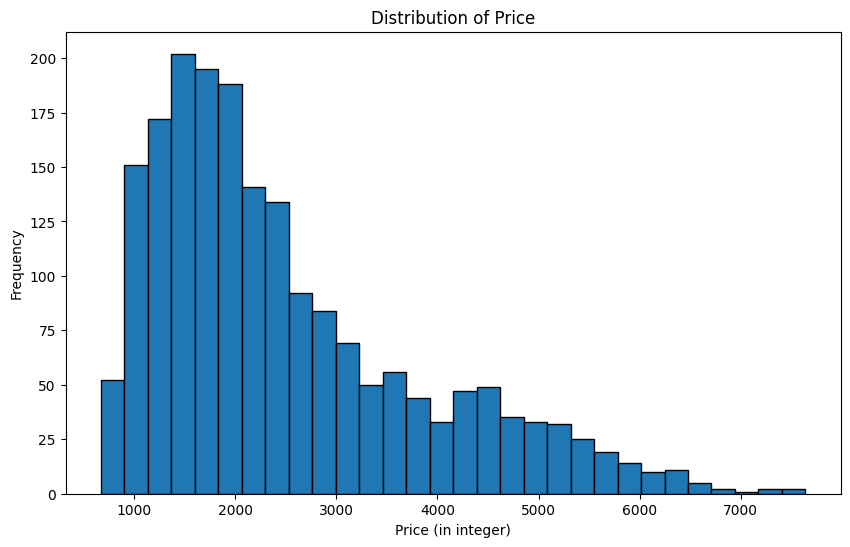

In [305]:
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=30, edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price (in integer)")
plt.ylabel("Frequency")
plt.show()

As evident the price range of most of the rentals is between 1000 to 2000.
- For Renters: If affordability is the target, the 1,500 - 3,000 range appears to have the most options.
- For Investors/Landlords: Properties priced above 5,000 may have lower demand, requiring unique features (e.g., prime location, luxury amenities) to justify the price.
- For Market Analysts: The long tail of expensive listings suggests a small but significant luxury market.


Now let us check the Bedroom distribution and how it affects the price -

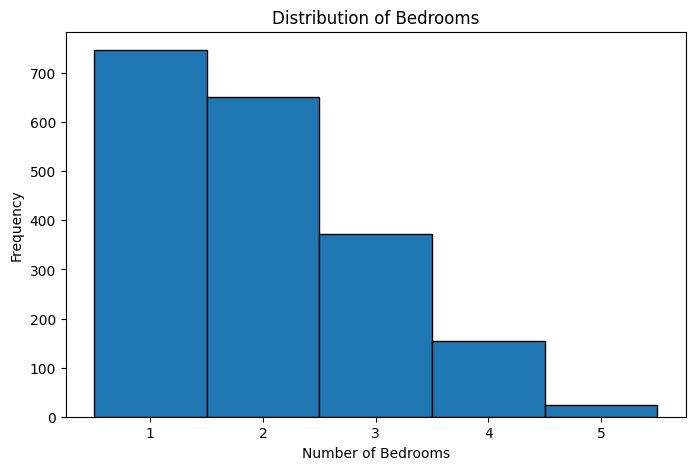

In [306]:
min_bed = int(df["Bedrooms"].min())
max_bed = int(df["Bedrooms"].max())
plt.figure(figsize=(8, 5))
plt.hist(df["Bedrooms"].dropna(), bins=range(min_bed, max_bed + 2), align="left", edgecolor="black")
plt.title("Distribution of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")
plt.show()

The high number of 1-2 bedroom rentals suggests that demand is strongest in that segment, possibly due to affordability or urban living preferences.

Let us try to check the impact on price -

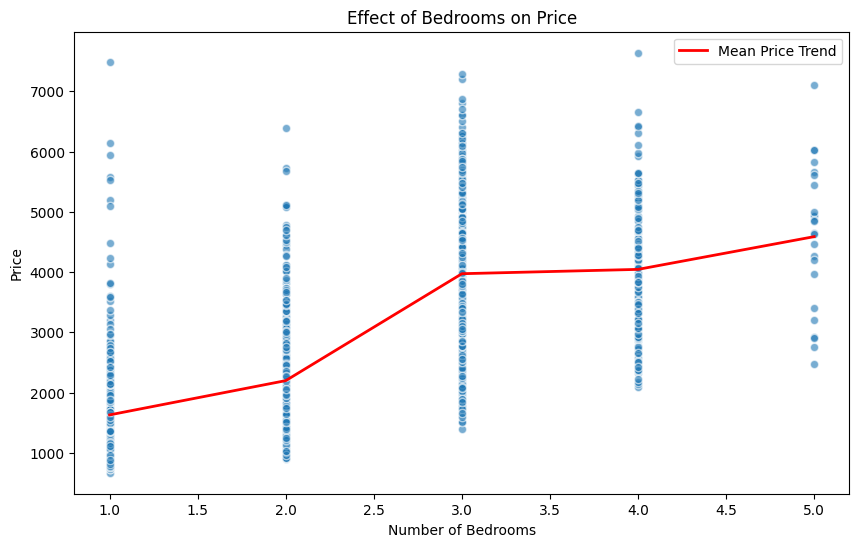

In [307]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Bedrooms"], df["Price"], alpha=0.6, edgecolors="w")
plt.title("Effect of Bedrooms on Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

bedroom_means = df.groupby("Bedrooms")["Price"].mean().reset_index()
plt.plot(bedroom_means["Bedrooms"], bedroom_means["Price"], color="red", linewidth=2, label="Mean Price Trend")
plt.legend()
plt.show()

As the number of bedrooms increases, the average rental price also tends to increase. This trend is visible in the red line representing the mean price.
- For Renters: If affordability is the target, 1-2 bedroom rentals may offer better value.
- For Investors/Landlords: Adding a third bedroom may significantly boost rental income, but beyond that, the price increase is more gradual.

Now let us check the Bathroom distribution -

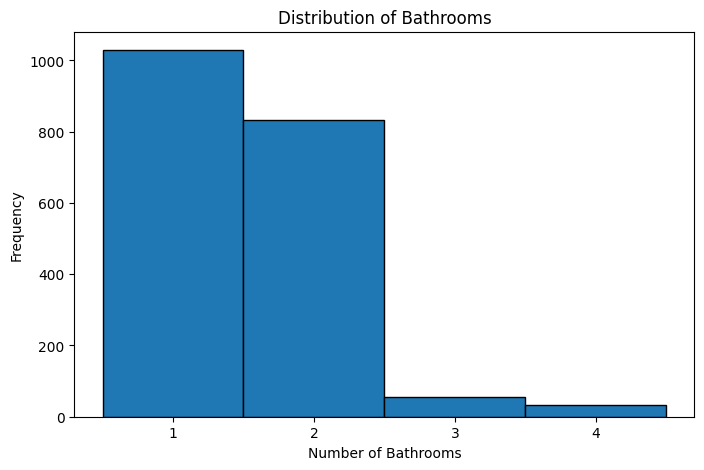

In [308]:
filtered_df = df[df["Bathrooms"].isin([1, 2, 3, 4])]

plt.figure(figsize=(8, 5))
plt.hist(filtered_df["Bathrooms"], bins=[0.5, 1.5, 2.5, 3.5, 4.5], edgecolor="black", align="mid")

plt.xticks([1, 2, 3, 4])

plt.title("Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")

plt.show()

Majority of the rentals available have either 1 or 2 bathrooms, very few have other options.  
Ample options will be available in the 1-2 bathroom range, but finding 3+ bathroom rentals might be challenging.


Let us try to check the impact on price -

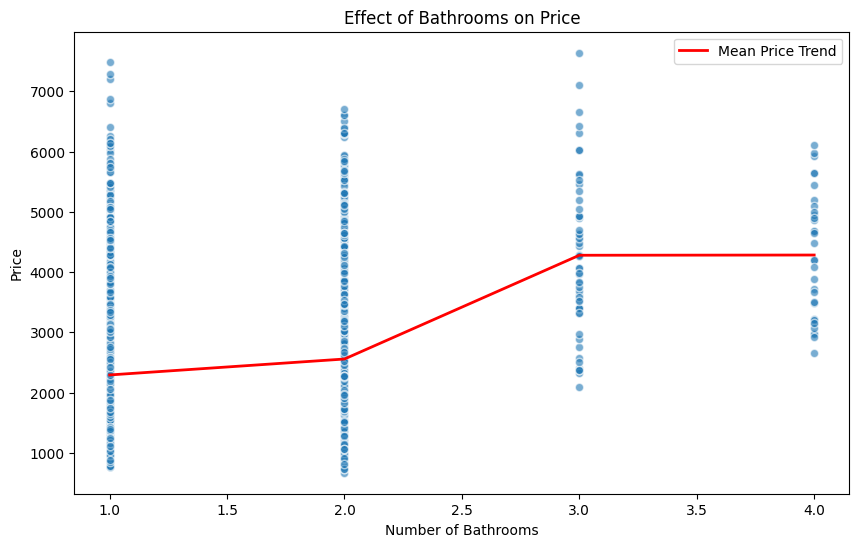

In [309]:
plt.figure(figsize=(10, 6))

plt.scatter(df["Bathrooms"], df["Price"], alpha=0.6, edgecolors="w")
plt.title("Effect of Bathrooms on Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")

bathroom_means = df.groupby("Bathrooms")["Price"].mean().reset_index()
plt.plot(bathroom_means["Bathrooms"], bathroom_means["Price"], color="red", linewidth=2, label="Mean Price Trend")

plt.legend()
plt.show()

Key insights from this -
- For Renters: If budget is a priority, properties with 1-2 bathrooms offer the most affordable options.
- For Investors/Landlords: Adding a third bathroom can significantly increase rental value, but adding a fourth bathroom may not provide the same return on investment.
- For Analysts: The large price range within each bathroom count suggests that bathrooms alone don’t fully determine rental price—other features must be considered.

Now lets check the lease length distribution -

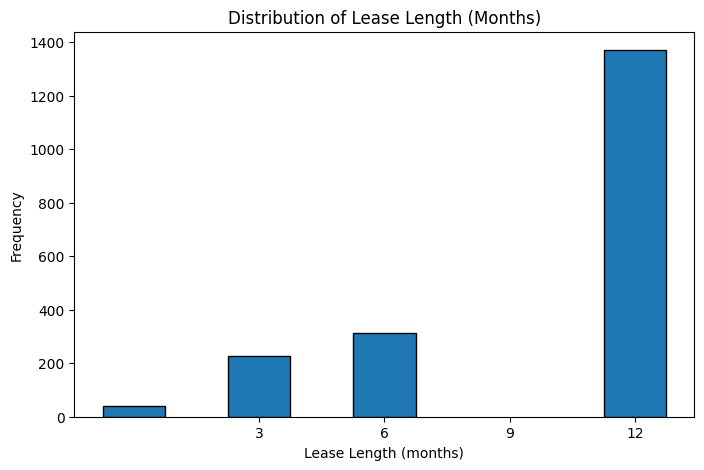

In [310]:
lease_counts = filtered_df["Lease Length"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(lease_counts.index, lease_counts.values, width=1.5, edgecolor="black")

plt.xticks([3, 6, 9, 12])

plt.title("Distribution of Lease Length (Months)")
plt.xlabel("Lease Length (months)")
plt.ylabel("Frequency")

plt.show()

Most of the properties are rented for a 12 month period  
Key Insights from this -
- For Renters: If you're looking for a short-term lease, options may be limited to specific properties.
- For Investors/Landlords: There may be an opportunity to attract tenants by offering more flexible short-term lease options, especially for people in temporary work contracts or students.
- For Market Analysts: The dominance of 12-month leases suggests a stable rental market where tenants are expected to stay for a full year.

Checking the impact on price -

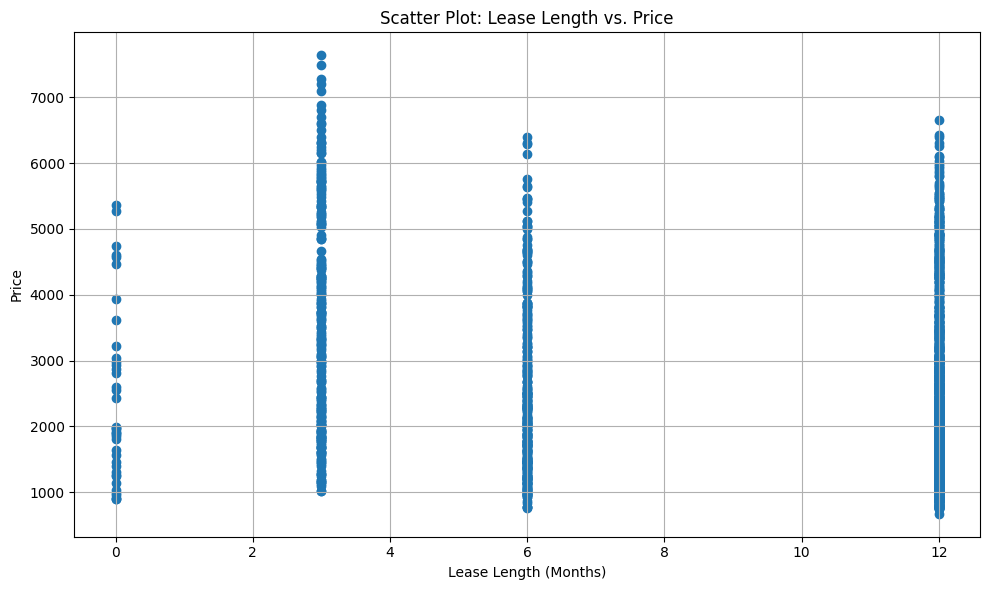

In [311]:
lease_price_data = (
    df.groupby("Lease Length")["Price"]
    .mean()
    .reset_index()
    .sort_values("Lease Length")
)

plt.figure(figsize=(10, 6))
plt.scatter(df["Lease Length"], df["Price"])
plt.xlabel("Lease Length (Months)")
plt.ylabel("Price")
plt.title("Scatter Plot: Lease Length vs. Price")
plt.grid(True)
plt.tight_layout()
plt.show()



There is not much impact of lease length on the price of the rental, as observed from the above scatter plot   
Although, the mean price might be slightly greater for 3 month lease period as compared to 6 and 12 months, which is approximately same

Now lets check the Parking and Garden distribution -

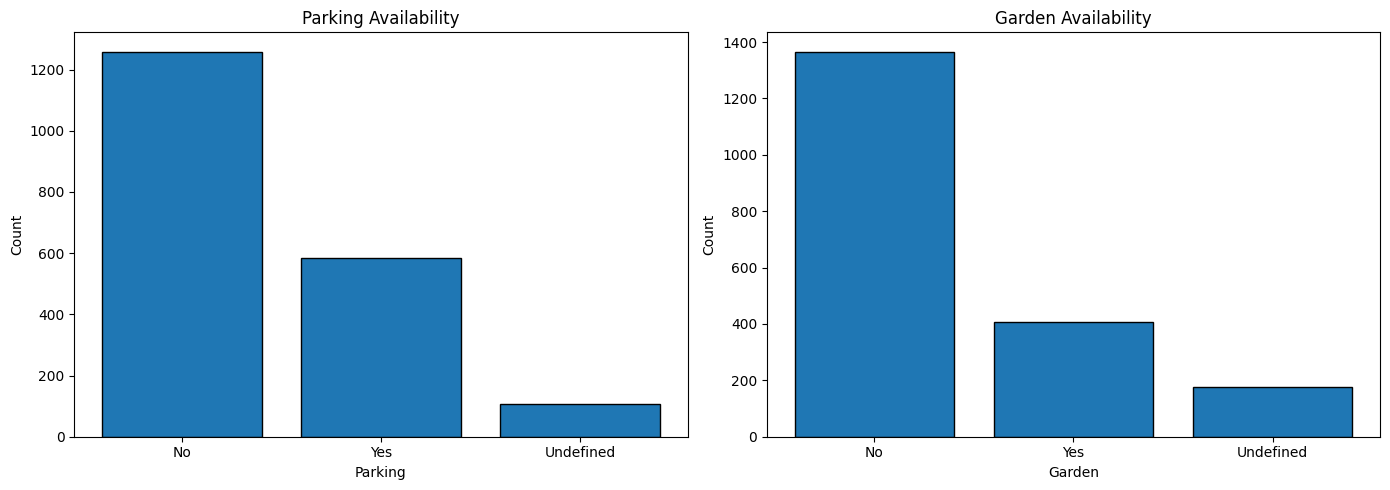

In [312]:
parking_counts = df["Parking"].value_counts()
garden_counts = df["Garden"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(parking_counts.index, parking_counts.values, edgecolor="black")
axes[0].set_title("Parking Availability")
axes[0].set_xlabel("Parking")
axes[0].set_ylabel("Count")

axes[1].bar(garden_counts.index, garden_counts.values, edgecolor="black")
axes[1].set_title("Garden Availability")
axes[1].set_xlabel("Garden")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

KEy insights from this -
- The majority of listings around 65% do not have parking.  
- Finding rentals with parking may be challenging, particularly in high-demand areas.  
- The low parking availability suggests a trend toward public transport reliance or city living with minimal car ownership.  
- Similar to parking, most rentals nearly 70% do not have a garden.  
- Properties with gardens may stand out in the market, appealing to families or tenants seeking outdoor space.

Let us check Parking availability impact on rental prices -

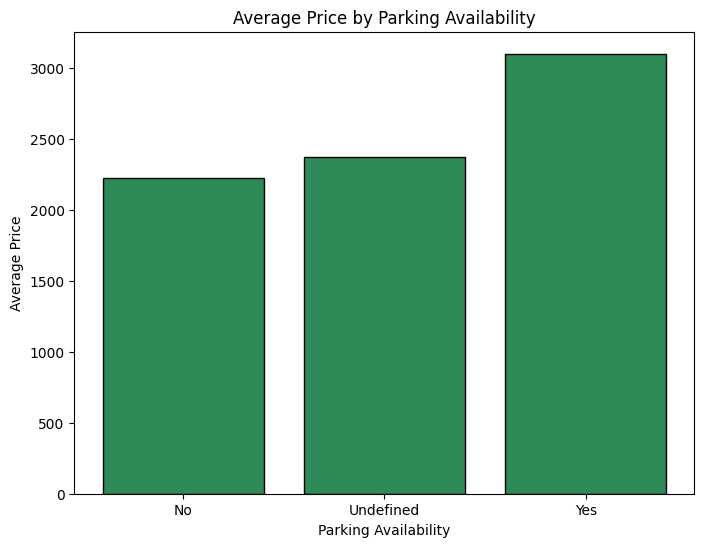

In [313]:
parking_avg = df.groupby("Parking")["Price"].mean().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(parking_avg.index, parking_avg.values, color='seagreen', edgecolor='black')
plt.xlabel("Parking Availability")
plt.ylabel("Average Price")
plt.title("Average Price by Parking Availability")
plt.show()

Listings where parking is "Undefined" have a slightly higher average price than "No" parking  
This could mean:
- Some properties do have parking but it’s not explicitly listed.
- These properties might include luxury or mixed-use spaces, causing their price to be slightly higher.

Meaning -
  
- For Renters: If you don’t need parking, choosing a non-parking rental can save around $800+ per month.
- For Investors/Landlords: Providing parking can significantly increase rental prices, making it a profitable investment.


Let us check Parking availability impact on rental prices -

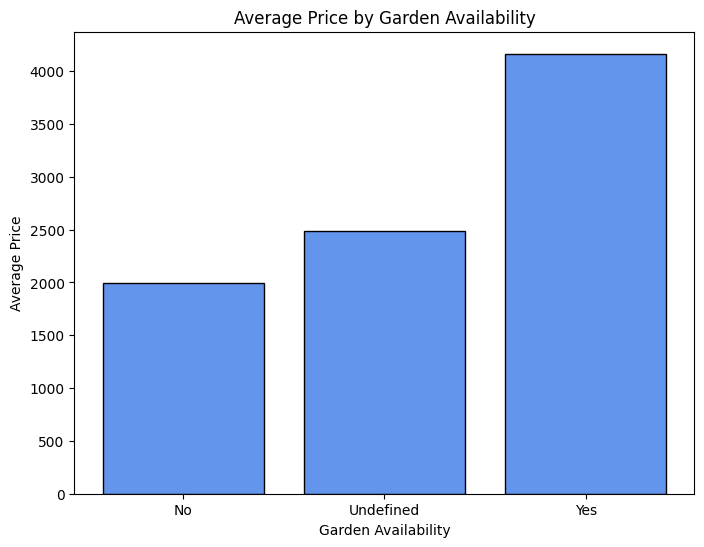

In [314]:
garden_avg = df.groupby("Garden")["Price"].mean().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(garden_avg.index, garden_avg.values, color='cornflowerblue', edgecolor='black')
plt.xlabel("Garden Availability")
plt.ylabel("Average Price")
plt.title("Average Price by Garden Availability")
plt.show()

Key insights from this -
- The price difference between "No Garden" and "Yes Garden" is substantial (~$2,000 increase).
- This indicates that renters are willing to pay a premium for outdoor space, making gardens an attractive feature in rental properties.

Now we have checked all the amenities and their impact on the prices, let us know see the impact of time on the prices -

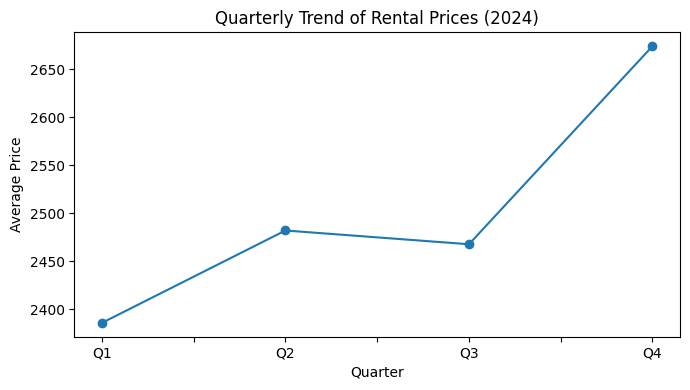

In [315]:
df["Quarter"] = pd.Categorical(
    df["Quarter"],
    categories=["Q1", "Q2", "Q3", "Q4"],
    ordered=True
)

quarterly_data = df.groupby("Quarter", observed=False)["Price"].mean()

plt.figure(figsize=(7, 4))
quarterly_data.plot(marker="o") 
plt.title("Quarterly Trend of Rental Prices (2024)")
plt.xlabel("Quarter")
plt.ylabel("Average Price")
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

The trend shows an overall increase in rental prices from Q1 to Q4.  
This suggests that rents tend to rise towards the end of the year, possibly due to higher demand in Q4.  
Q1 to Q2 shows a price increase, likely due to seasonal demand (e.g., more leases signed during spring/summer).  
Q2 to Q3 has a slight decrease, suggesting a temporary slowdown, possibly due to fewer people moving in late summer.

Important takeaways -
- For Renters: Q3 might be the best time to find a rental deal before prices surge in Q4.
- For Landlords: Listing properties in Q4 could yield higher rents, as demand spikes.
- For Market Analysts: Identifying seasonal rental trends can help forecast optimal pricing strategies.

Now let us check the locality impact  
As Dublin is majorly divided in 2 parts north and south - lets check what is the impact of that -

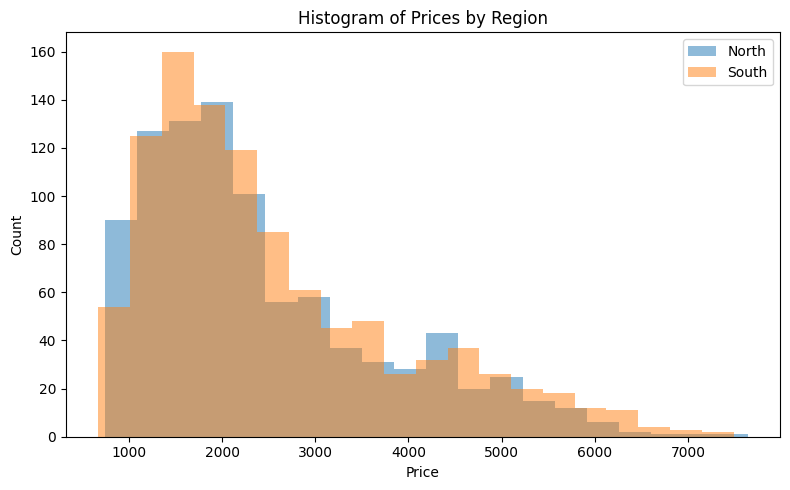

In [316]:
def get_region(location_str):

    loc_lower = str(location_str).lower()
    if "north" in loc_lower:
        return "North"
    elif "south" in loc_lower:
        return "South"
    else:
        return "Other"

df["Region"] = df["Location"].apply(get_region)
df_north = df[df["Region"] == "North"]["Price"]
df_south = df[df["Region"] == "South"]["Price"]

plt.figure(figsize=(8, 5))

plt.hist(df_north, bins=20, alpha=0.5, label="North")

plt.hist(df_south, bins=20, alpha=0.5, label="South")

plt.title("Histogram of Prices by Region")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

Key insights -
- Most properties fall in the €1,500 - €3,000 range, making it the standard rental bracket.
- North Dublin offers more affordable rentals, while South Dublin has more luxury properties.
- South Dublin dominates the high-end rental market, exceeding €4,500 more frequently.
- Renters seeking affordability should look in the North, while landlords can target premium listings in the South.

Finally, let us check the prices by locality -

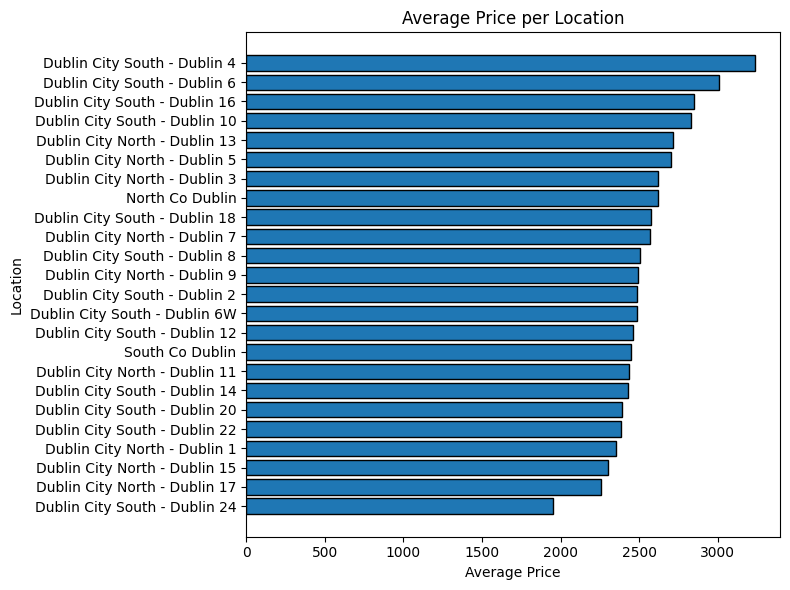

In [317]:
location_avg_price = (
    df.groupby("Location")["Price"]
    .mean()
    .reset_index()
)

location_avg_price.sort_values(by="Price", ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(location_avg_price["Location"], location_avg_price["Price"], edgecolor="black")
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.title("Average Price per Location")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Prime city areas (D4, D6, D16) are the most expensive, likely due to demand and property quality.  
Budget-friendly options exist in Dublin 24, 17, and 15.  
Key Takeaways -
- For Renters: If looking for affordability, North Dublin and suburban areas offer lower-cost options.
- For Landlords: Properties in Dublin City South (D4, D6, D16) can command premium rents.
- For Investors: High-demand areas in South Dublin may offer better returns, but cheaper properties in North Dublin may attract more tenants due to affordability.

# Conclusion

## Challenges Faced
- Data Cleaning: The price column contained mixed formats, including currency symbols (€, etc.) and text such as "monthly," making it difficult to extract numerical values. This required careful text processing using regular expressions.
- Although there were no null values, the datapoints where the value was unknown was denoted by -'???'
- Scraping Approach: Initially, a hardcoded approach was used to scrape the first pages of different quarters. This was later improved by dynamically generating URLs from the base page.
- Pagination Handling: The first attempt at handling pagination involved incrementing a counter and checking for a 200 response. However, this was refined by first extracting the total number of pages from the first page and then looping through them to construct URLs for scraping.

## Overall Market Insights

- **Rental Price Range**  
  - Prices range from about €670 to €7,640.  
  - Median price hovers around €2,090.  
  - Most listings cluster between €1,000 and €3,000.

- **Bedrooms & Bathrooms**  
  - 1–2 bedrooms and 1–2 bathrooms dominate the market.  
  - Each additional bedroom or bathroom typically increases rent, though gains taper off after 3.

- **Lease Length**  
  - 12-month leases are most common, indicating a stable, long-term rental market.  
  - Shorter-term (3–6 months) leases are fewer but may command slightly higher rents.

- **Amenities (Parking & Garden)**  
  - **Parking**: ~65% of listings lack parking. Properties with parking or undefined parking typically command higher rents.  
  - **Garden**: ~70% of rentals do not offer a garden, but having a garden can add roughly €2,000 to monthly rent.

- **Seasonal Trends**  
  - Rents generally rise from Q1 to Q4.  
  - A slight Q3 dip may provide better deals for renters.  
  - Q4 sees higher prices, suggesting strong demand at year-end.

- **Locality (North vs. South & Postal Codes)**  
  - **North Dublin**: More affordable, with many options in the €1,500–€3,000 range.  
  - **South Dublin**: Luxury segment above €4,500, especially in D4, D6, D16.  
  - **Budget-Friendly**: D24, D17, D15 offer lower-cost rentals.



## Key Takeaways

### For Renters
- Focus on 1–2 bedroom, 1–2 bathroom properties for affordability.  
- Q3 might be the best time to secure lower rents.  
- Look to North Dublin or suburbs (e.g., D24, D17, D15) for budget-friendly options.

### For Investors/Landlords
- Adding a third bedroom or bathroom can yield a notable rent boost.  
- Parking or gardens can command premium prices.  
- South Dublin (D4, D6, D16) often achieves higher rents, with Q4 providing optimal demand.

### For Market Analysts
- The market exhibits a broad mid-range and a smaller, significant luxury segment.  
- Seasonal variations show rents peaking toward the end of the year.  
- Geographical disparities highlight clear premium vs. budget areas.  


## Further Analysis and Data Integration Suggestions

1. **Property Features and Quality**  
   - Include detailed property features (e.g., property age, renovations, interior quality) to refine price predictions.  
   - Analyze whether modern amenities (smart home technology, high-speed internet) influence the rental price.

2. **Location-Based Analysis**  
   - Explore micro-locations within postal codes (e.g., proximity to public transit, schools, commercial centers).  
   - Conduct a spatial clustering or heatmap analysis to visualize rental hotspots and emerging areas.

3. **Policy and Regulation Impacts**  
   - Assess how changes in rental regulations (e.g., rent caps, tenant rights) could influence pricing and availability.  
   - Monitor if policy changes lead to shifts in short-term vs. long-term lease offerings.

These additional steps can provide deeper insights into the drivers of rental prices and highlight opportunities or risks for all market participants.